This script is used to generate test vectors for a testbench:  We generate a 8-bit vector that consists of 6-bit I/Q samples

In [8]:
%matplotlib inline
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

In [9]:
def ConvertToHex(value,bitwidth):
    """
    Converts the value field to 2's compliment hex format
    :param value:  value to convert
    :param bitwidth:   bitwidth of number
    :return:  converted value
    """
    value = int(value)
    if (value > (2**(bitwidth-1) - 1)):
        print('bit conversion failed, too positive')
        return "NULL"
    if (value < -(2**(bitwidth))):
        print('bit conversiion failed, too negative')
        return "NULL"
    # handle negative calculation
    if (value < 0):
        # wrap around to larger positive value, since
        # hex(-100) = -0x64, a not useful response
        value = value + 2**bitwidth;
    value_string = hex(value)
    # now if the value was positive, we want it
    # to take up the correct number of bits
    # chop of the 0x portion
    value_string = value_string[2: ]
    zeros_to_pad = bitwidth // 4 - len(value_string)
    string_out = zeros_to_pad*'0' + value_string
    return string_out

In [10]:
# First create the sinewave at 640Msps that we interpolate to 640.625Msps
t = np.arange(65536)
Fs = 640
F = 100
sig_in = (2**5-1)*(np.cos(2*np.pi*F/Fs*t) + 1j*np.sin(2*np.pi*F/Fs*t))
sig_round = np.round(sig_in)

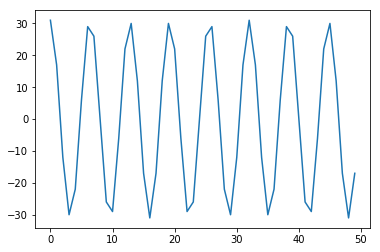

In [11]:
plt.plot(sig_round.real[0:50])

In [12]:
wave_640_hex_real = []
wave_640_hex_imag = []

for x, item in enumerate(sig_round):
    wave_640_hex_real.append(ConvertToHex(item.real, 8))
    wave_640_hex_imag.append(ConvertToHex(item.imag, 8))

In [13]:
f1 = open('waveform_tone_640_real_gain.dat', 'w')
f2 = open('waveform_tone_640_imag_gain.dat', 'w')

for item in wave_640_hex_real:
    f1.write(f'{item}\n')

for item in wave_640_hex_imag:
    f2.write(f'{item}\n')

    
f1.close()
f2.close()